In [ ]:
# Mount Drive Folder to Colab
from google.colab import drive
drive.mount("/content/gdrive")

!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/learn openCV2
!ls

Mounted at /content/gdrive
ln: failed to create symbolic link '/mydrive/My Drive': File exists
/content/gdrive/My Drive/learn openCV2
opencv_py1.ipynb  sampleIMG


In [ ]:
# Installing Packages

# !pip install caer canaro
# !pip install colorthief

In [ ]:
#Libraries

import os
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from sklearn.cluster import KMeans

In [ ]:
# Constant Values

img_num = 2
files_pathby_pathlib = Path("sampleIMG")
files_pathby_osdir = os.listdir("sampleIMG")

classes = ["Person", "Car"]

In [ ]:
# File Dir Reader


# Using OS dir

def show_images_from_folderby_osdir(image_data):
  try:
    # store_ospath = [os.path.join("sampleIMG", f) for f in image_data]
    store_ospath = []
    for f in image_data:
     file_path = os.path.join("sampleIMG", f)
     store_ospath.append(file_path)
    return store_ospath

  except FileNotFoundError:
    print("Invalid file or File not found")


# -------------------------------------------------------------


# Using Pathlib

def show_images_from_folderby_pathlib(folder):
  try:
    image_data = []
    for img_path in folder.iterdir():
      if img_path.suffix.lower() in [".jpg", ".png", ".jpeg"]:
        image_data.append(img_path.as_posix())
        # print(image_data)
      else:
        print(f"Failed to load files from {img_path}")

    return image_data

  except FileNotFoundError:
    print("Invalid files or File not found")


# CV2 Learning Start

In [ ]:
# Draw and Write

def draw(image_path, txt):

  image_path = cv2.rectangle(
      image_path,
      (80, 80),
      (220, 180),
      (0, 255, 0),
      thickness=2
      )

  image_path = cv2.putText(
      image_path,
      txt,
      (190, 70),
      cv2.FONT_HERSHEY_COMPLEX,
      1.6,
      (255, 0, 0),
      thickness=2
      )

  return image_path

In [ ]:
# RGB to GreyScale [Images]

def tranform_greyscale(image):
  gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return gray_img

In [ ]:
# Split/Merge BGR Channels (CV2 format)

def split_colors(image):
  blank = np.zeros(image.shape[:2], dtype="uint8")
  b,g,r = cv2.split(image)
  blue = cv2.merge([b,blank,blank])
  green = cv2.merge([blank,g,blank])
  red = cv2.merge([blank,blank,r])
  return blue, green, red

In [ ]:
# Masking [bitwise]

# def mask_img(image):
#   tl = (10, 10)
#   br = (100, 100)
#   blank = np.zeros(image.shape[:2], dtype="uint8")
#   recmask = cv2.rectangle(blank, tl, br, (0, 255, 0), -1)
#   masked_img = cv2.bitwise_and(image, recmask, mask=blank)
#   return masked_img


In [ ]:
# Masking 2

def mask_img(image):
  tl = (10, 10)
  br = (100, 100)
  blank = np.zeros_like(image)
  recmask = cv2.rectangle(blank, tl, br, (0, 255, 0), -1)
  return blank

In [ ]:
# Mask Overlay

def overlay_mask(image):
  overlaid_img = image.copy()
  tl = (10, 10)
  br = (100, 100)
  cv2.rectangle(overlaid_img, tl, br, (0, 255, 0), -1)
  return overlaid_img

In [ ]:
# Detector using Cascade CV2

def cascade_detector(image):
  ...

In [ ]:
# Extract Image Colors (SkLearn[Cluster] - KMeans)

def color_palette(image, num_colors, swatch_size):

  pixel_data = image.reshape((-1, 3))

  kmeans = KMeans(n_clusters=num_colors, n_init=10)
  kmeans.fit(pixel_data)
  colors = kmeans.cluster_centers_.astype(int)

  palette_img = np.zeros((swatch_size, swatch_size * len(colors), 3), dtype=np.uint8)
  for i, color in enumerate(colors):
    palette_img[:, i*swatch_size:(i+1)*swatch_size, :] = color

  return palette_img


In [ ]:
# CV2 color for plot label

## *Image Plotter Custom Functions*

In [ ]:
# Show images (one image in (1row 4cols))
# def plot_the_img(
#     image_data,
#     title="Image(s) from Drive",
#     img_num=3,
#     ):
#   for i in range(img_num):
#       display_image = cv2.imread(str(image_data[i]))

#       if display_image is not None:
#         show_img = cv2.cvtColor(display_image, cv2.COLOR_BGR2RGB)
#         if i == 0:
#           fig, axs = plt.subplots(1, img_num)
#           if img_num == 1:
#             axs = [axs]
#         axs[i].set_axis_off()
#         axs[i].imshow(show_img)

#   plt.suptitle(title)
#   plt.axis("off")
#   plt.show()

# bg = show_images_from_folderby_osdir(files_pathby_osdir)
# plot_the_img(bg)


In [ ]:
# Plot the Images with Conditions

def plot_the_img(
    image_data,
    title="Image(s) from Drive",
    img_num=1,
    txt="Label",
    num_colors=5,
    swatch_size=1,
    isGreyScale=False,
    drawBox=False,
    splitRed=False,
    splitBlue=False,
    splitGreen=False,
    masking=False,
    imgOverlay=False,
    showSKLearnColorPalette=False
    ):

    # print(image_data)
    for i in range(img_num):
      display_image = cv2.imread(str(image_data[i]))

      if display_image is not None:
        different_plots = []
        pltname = []
        b,g,r = split_colors(display_image)


# -------------- Custom Functions ----------------------------------

        # Original Image
        img_origin = cv2.cvtColor(display_image, cv2.COLOR_BGR2RGB)
        different_plots.append(img_origin)
        pltname.append("Original")

        # 1st layer [GreyScale]
        if isGreyScale:
          grey = tranform_greyscale(display_image)
          greyscaled = cv2.cvtColor(grey, cv2.COLOR_BGR2RGB)
          different_plots.append(greyscaled)
          pltname.append("Gray Scale")

        # Color Split
        if splitBlue:
          different_plots.append(cv2.cvtColor(b, cv2.COLOR_BGR2RGB))
          pltname.append("Blue Color Seperated")
        if splitGreen:
          different_plots.append(cv2.cvtColor(g, cv2.COLOR_BGR2RGB))
          pltname.append("Green Color Seperated")
        if splitRed:
          different_plots.append(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))
          pltname.append("Red Color Seperated")

        # Masking Images
        if masking:
          masked_img = mask_img(display_image)
          different_plots.append(masked_img)
          pltname.append("Masked Image")
        if imgOverlay:
          overlay_img = overlay_mask(display_image)
          different_plots.append(cv2.cvtColor(overlay_img, cv2.COLOR_BGR2RGB))
          pltname.append("Overlaid Image")

        # Color Palette
        if showSKLearnColorPalette:
          color_list_img = color_palette(display_image, num_colors, swatch_size)
          # print(color_list)
          different_plots.append(cv2.cvtColor(color_list_img, cv2.COLOR_BGR2RGB))
          pltname.append("Original Image Colors")

# ----------------- Plot Customs ----------------------------------

        if i == 0:
          fig, axs = plt.subplots(
              img_num,
              len(different_plots),
              figsize=(len(different_plots) * 3, img_num * 4))
          if img_num == 1:
            # axs = np.expand_dims(axs, axis=0)
            # axs = [axs]
            axs = np.atleast_2d(axs)

        for j, plot_img in enumerate(different_plots):
          if drawBox and j != 0:
              draw(plot_img, txt)
          axs[i,j].imshow(plot_img)
          axs[i,j].set_axis_off()
          axs[i,j].set_title(pltname[j])

          # print(len(different_plots))
          # print(len(pltname))

    plt.suptitle(title)
    plt.axis("off")
    plt.show()

# *Test Ploting Image Results*

---

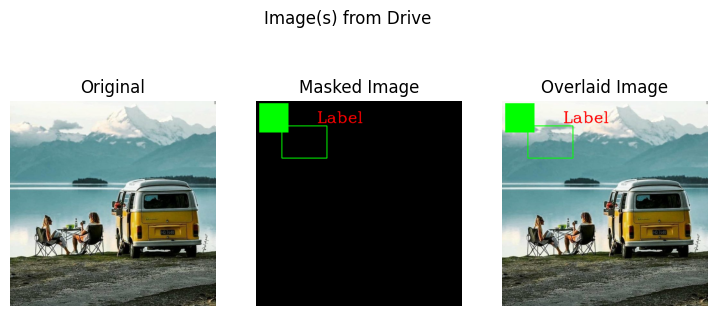

In [ ]:
# Look The Result

if __name__ == "__main__":

  # img1 = show_images_from_folderby_pathlib(files_pathby_pathlib)
  # img2 = show_images_from_folderby_osdir(files_pathby_osdir)

  # Sepecific Image
  # bg = [show_images_from_folderby_osdir(files_pathby_osdir)[1]]

  # List of Images
  bg = show_images_from_folderby_osdir(files_pathby_osdir)

  plot_the_img(
      bg,
      drawBox=True,
      isGreyScale=False,
      splitRed=False,
      splitBlue=False,
      splitGreen=False,
      imgOverlay=True,
      masking=True,
      showSKLearnColorPalette=False,
      )

  # print(bg)